In [6]:
import numpy as np
import os
import segyio

from pyfrac.visualisation.plotting_support import explode_volume
from pyfrac.visualisation.traceviz import wiggleplot, traceimage

%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
seispath = '/home/birniece/Documents/Projects/MicroseismicModelling/MicroseismicProcessing/FDModelling/UTAH_Homo_multi/outputs/su'
expname = 'UTAH_Homo_tst'

# PARAMETERS TO BE DEFINED

In [15]:
nr = 210
nt = 1000
n_srcs = 2

# SEISMOGRAMS

In [9]:
def read_seis(seisfile, nr):
    # s_wave_file = os.path.join(data_path,'test.bin.curl')
    seis_flat = np.loadtxt(seisfile)

    # determine number of timesamples and ensure it saved fully
    nt = int(seis_flat.shape[0] / nr)
    try:
        seis_flat.reshape((nr, nt))
    except:
        print('Not good dims \n nt:%i nr:%i \n vz flat:%i' % (nt, nr, seis_flat.shape[0]))

    # Resample to 2D
    seis = seis_flat[:nt * nr].reshape((nr, nt))
    return seis

In [13]:
vz.shape

(210, 1000)

In [18]:
vx = np.zeros([n_srcs, nr, nt])
vy = np.zeros([n_srcs, nr, nt])
vz = np.zeros([n_srcs, nr, nt])
for i in range(n_srcs):    
    vx[i]  = read_seis(os.path.join(seispath,'%s_vx.txt.shot%i'%(expname,i+1)), nr)
    vy[i]  = read_seis(os.path.join(seispath,'%s_vy.txt.shot%i'%(expname,i+1)), nr)
    vz[i]  = read_seis(os.path.join(seispath,'%s_vz.txt.shot%i'%(expname,i+1)), nr)


In [ ]:
fig,axs = wiggleplot(vz[::5,:1000]);
fig.suptitle('Vz', fontweight='bold')
plt.tight_layout()

(<Figure size 1200x600 with 2 Axes>,
 <Axes: title={'center': 'Seismic Recording'}, xlabel='Receiver #', ylabel='Time'>)

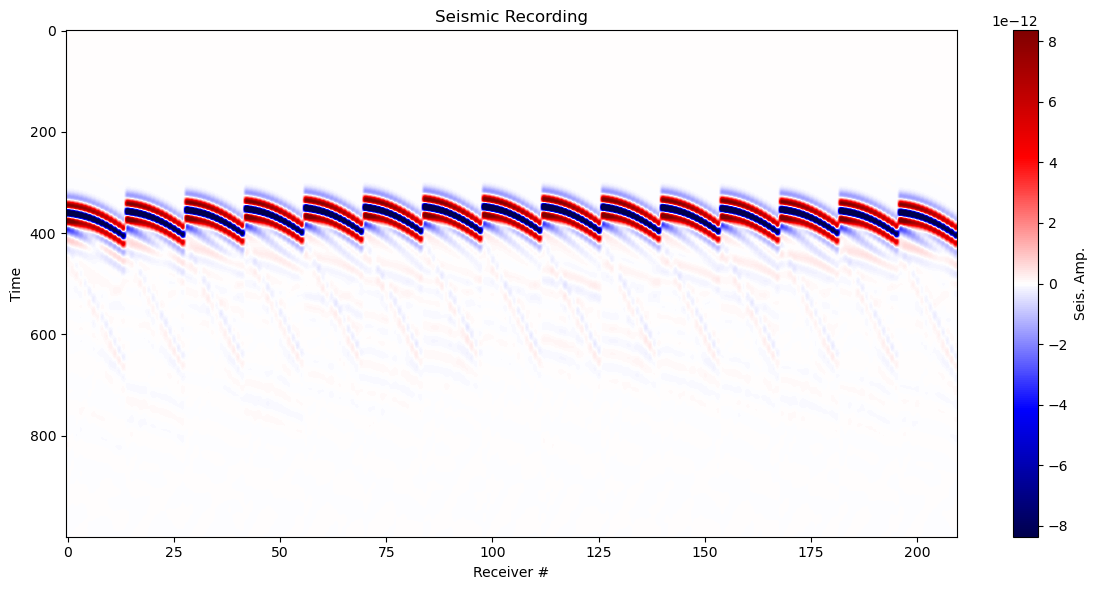

In [20]:
traceimage(vy[1], climQ=99.)